<center>

# Exploración de los datos

---

</center>

Importar y preparar las librerias que se usarán en el Notebook

In [52]:
import opendatasets as od
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
first_path = os.getcwd()

In [54]:
os.chdir(first_path)
dataset_link = "https://www.kaggle.com/competitions/udea-ai-4-eng-20252-pruebas-saber-pro-colombia/overview"
old_name = "udea-ai-4-eng-20252-pruebas-saber-pro-colombia"
new_name = "data"

# ejecutar si la carpeta "data" no existe
if not os.path.exists(new_name):
    od.download(dataset_link)
    if os.path.exists(old_name):
        os.rename(old_name, new_name)
    else:
        print(f"No se encontró la carpeta {old_name} después de la descarga")
else:
    print(f"La carpeta '{new_name}' ya existe")


La carpeta 'data' ya existe


Cargamos el set de entrenamiento

In [55]:
# moverse a la carpeta
os.chdir(new_name)
print(os.listdir())
archivo = "train.csv"
data = pd.read_csv(archivo)
os.chdir("../") # volvemos a la carpeta de todo el repositorio

['submission_example.csv', 'test.csv', 'train.csv']


<center>

**Vistazo rápido del conjunto de datos**

</center>

In [56]:
pd.set_option("display.max_columns", None) # Visualizar todas las columnas
data.head()

,ID,PERIODO_ACADEMICO,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,F_TIENEAUTOMOVIL,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_TIENEINTERNET.1,F_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,Si,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,No,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,No,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,No,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,Si,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294


In [57]:
data.nunique()

ID                             692500
PERIODO_ACADEMICO                   9
E_PRGM_ACADEMICO                  948
E_PRGM_DEPARTAMENTO                31
E_VALORMATRICULAUNIVERSIDAD         8
E_HORASSEMANATRABAJA                5
F_ESTRATOVIVIENDA                   7
F_TIENEINTERNET                     2
F_EDUCACIONPADRE                   12
F_TIENELAVADORA                     2
F_TIENEAUTOMOVIL                    2
E_PRIVADO_LIBERTAD                  2
E_PAGOMATRICULAPROPIO               2
F_TIENECOMPUTADOR                   2
F_TIENEINTERNET.1                   2
F_EDUCACIONMADRE                   12
RENDIMIENTO_GLOBAL                  4
INDICADOR_1                       375
INDICADOR_2                       342
INDICADOR_3                       196
INDICADOR_4                       276
dtype: int64

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692500 entries, 0 to 692499
Data columns (total 21 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ID                           692500 non-null  int64  
 1   PERIODO_ACADEMICO            692500 non-null  int64  
 2   E_PRGM_ACADEMICO             692500 non-null  object 
 3   E_PRGM_DEPARTAMENTO          692500 non-null  object 
 4   E_VALORMATRICULAUNIVERSIDAD  686213 non-null  object 
 5   E_HORASSEMANATRABAJA         661643 non-null  object 
 6   F_ESTRATOVIVIENDA            660363 non-null  object 
 7   F_TIENEINTERNET              665871 non-null  object 
 8   F_EDUCACIONPADRE             669322 non-null  object 
 9   F_TIENELAVADORA              652727 non-null  object 
 10  F_TIENEAUTOMOVIL             648877 non-null  object 
 11  E_PRIVADO_LIBERTAD           692500 non-null  object 
 12  E_PAGOMATRICULAPROPIO        686002 non-null  object 
 13 

In [59]:
data.describe(include="all")

,ID,PERIODO_ACADEMICO,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,F_TIENEAUTOMOVIL,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_TIENEINTERNET.1,F_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4
count,692500.000000,692500.000000,692500,692500,686213,661643,660363,665871,669322,652727,648877,692500,686002,654397,665871,668836,692500,692500.000000,692500.000000,692500.000000,692500.000000
unique,NaN,NaN,948,31,8,5,7,2,12,2,2,2,2,2,2,12,4,NaN,NaN,NaN,NaN
top,NaN,NaN,DERECHO,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,Más de 30 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Si,No,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,NaN,NaN,NaN,NaN
freq,NaN,NaN,53244,282159,204048,249352,232671,592514,128289,563390,412606,692466,382201,597670,592514,141744,175619,NaN,NaN,NaN,NaN
mean,494606.130576,20198.366679,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.268629,0.259996,0.262087,0.262903
std,285585.209455,10.535037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.122130,0.093480,0.058862,0.067944
min,1.000000,20183.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
25%,247324.750000,20195.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.203000,0.212000,0.254000,0.255000
50%,494564.500000,20195.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.240000,0.271000,0.276000,0.285000
75%,741782.500000,20203.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.314000,0.309000,0.293000,0.303000


<center>

**Gráficos de algunas variables de interes**

</center>

In [60]:
data["E_VALORMATRICULAUNIVERSIDAD"].unique()

array(['Entre 5.5 millones y menos de 7 millones',
       'Entre 2.5 millones y menos de 4 millones',
       'Entre 4 millones y menos de 5.5 millones', 'Más de 7 millones',
       'Entre 1 millón y menos de 2.5 millones',
       'Entre 500 mil y menos de 1 millón', 'Menos de 500 mil',
       'No pagó matrícula', nan], dtype=object)

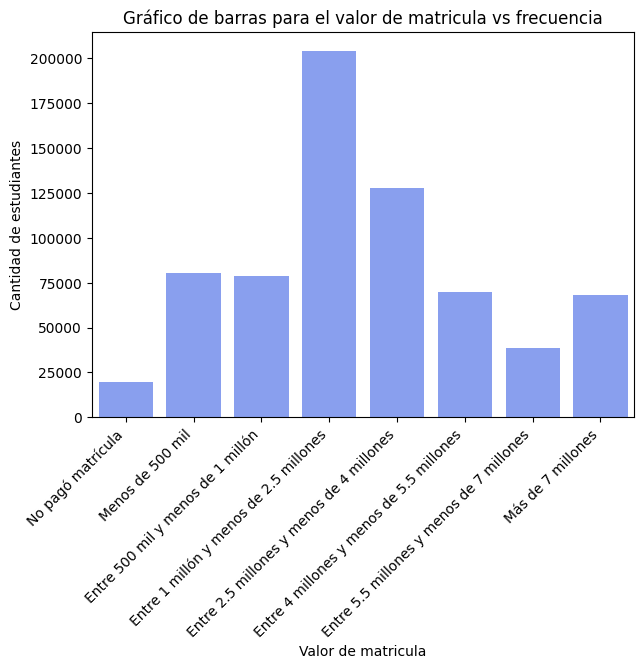

In [61]:
order = ["No pagó matrícula", "Menos de 500 mil", "Entre 500 mil y menos de 1 millón", "Entre 1 millón y menos de 2.5 millones", "Entre 2.5 millones y menos de 4 millones", "Entre 4 millones y menos de 5.5 millones" , "Entre 5.5 millones y menos de 7 millones", "Más de 7 millones"]
plt.figure(figsize=(7,5))
sns.countplot(data=data, x="E_VALORMATRICULAUNIVERSIDAD", color="#7895FF", order=order)
plt.title("Gráfico de barras para el valor de matricula vs frecuencia")
plt.xlabel("Valor de matricula")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Cantidad de estudiantes")
plt.show()

<center>

La mayoria de estudiantes pagan un valor de matricula de entre 1 y 2.5 millones de pesos, la minoria no pagan matricula, vemos que se forman colas en los extremos, casi como si fuera una distribución normal con media entre 1 y 2.5

</center>

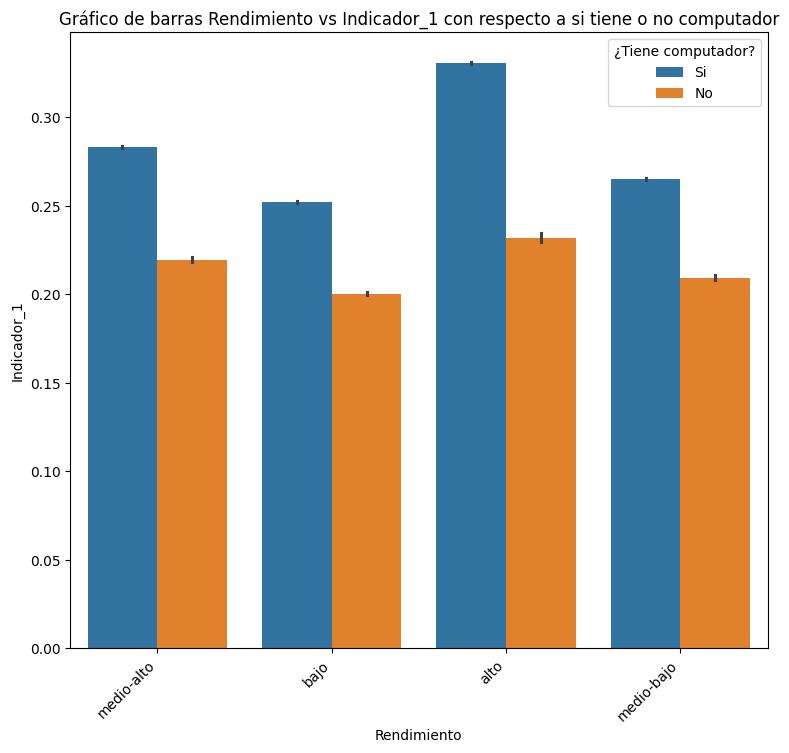

In [62]:
plt.figure(figsize=(9,8))
sns.barplot(data=data, x="RENDIMIENTO_GLOBAL", y="INDICADOR_1", hue="F_TIENECOMPUTADOR")
plt.title("Gráfico de barras Rendimiento vs Indicador_1 con respecto a si tiene o no computador")
plt.xlabel("Rendimiento")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Indicador_1")
plt.legend(title="¿Tiene computador?")
plt.show()

<center>

La gente con computador y su rendimiento parece estar relacionado con el indicador 1, donde si tiene computador o su rendimiento es más alto, tiene un indicador mayor que aquellos sin computador y rendimiento más bajo

</center>

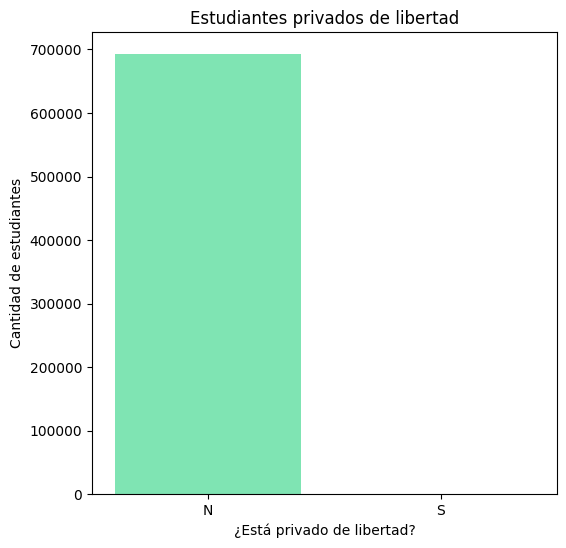

In [63]:
plt.figure(figsize=(6,6))
sns.countplot(data=data, x="E_PRIVADO_LIBERTAD", color="#6EF5B3")
plt.title("Estudiantes privados de libertad")
plt.xlabel("¿Está privado de libertad?")
plt.ylabel("Cantidad de estudiantes")
plt.show()

No se puede visualizar bien la cantidad de estudiantes que si están privados de la libertad, contemos cuants hay de cada subcategoria

In [64]:
data["E_PRIVADO_LIBERTAD"].value_counts()

E_PRIVADO_LIBERTAD
N    692466
S        34
Name: count, dtype: int64

In [65]:
perc_priv = data["E_PRIVADO_LIBERTAD"].value_counts().iloc[1]/data["E_PRIVADO_LIBERTAD"].value_counts().iloc[0] * 100
print(f"Solo el {perc_priv:.5f}% de las personas en esta muestra están privadas de la libertad,\nes probable que no aporten mucho al modelo")

Solo el 0.00491% de las personas en esta muestra están privadas de la libertad,
es probable que no aporten mucho al modelo


In [66]:
tabla_comp_rend = pd.crosstab(data["F_TIENECOMPUTADOR"], data["RENDIMIENTO_GLOBAL"])
tabla_comp_rend.index.name = "¿Tiene computador?"
tabla_comp_rend.columns.name = "Rendimiento Global"
tabla_comp_rend

Rendimiento Global,alto,bajo,medio-alto,medio-bajo
¿Tiene computador?,,,,
No,6072,23128,11321,16206
Si,161884,137066,151493,147227


In [67]:
# vectores de 2 elementos cada uno, el primer elemento de cada uno es el porcentaje correspondiente
# (alto, bajo, medio_alto, medio_bajo) de personas que no tienen computador
# el segundo elemento es para aquellos que si tienen computador
high_perc = []
low_perc = []
mid_high_perc = []
mid_low_perc = []

for i in range(tabla_comp_rend.shape[0]):
    sum1 = 0
    for j in range(tabla_comp_rend.shape[1]):
        sum1 += tabla_comp_rend.iloc[i].iloc[j]
    high_perc.append(tabla_comp_rend.iloc[i].iloc[0]/sum1)
    low_perc.append(tabla_comp_rend.iloc[i].iloc[1]/sum1)
    mid_high_perc.append(tabla_comp_rend.iloc[i].iloc[2]/sum1)
    mid_low_perc.append(tabla_comp_rend.iloc[i].iloc[3]/sum1)


print(f"Porcentaje de personas que NO tienen computador y su rendimiento es alto: {high_perc[0]*100:.4f}%")
print(f"Porcentaje de personas que SI tienen computador y su rendimiento es alto: {high_perc[1]*100:.4f}%")
print(f"Porcentaje de personas que NO tienen computador y su rendimiento es medio_alto: {mid_high_perc[0]*100:.4f}%")
print(f"Porcentaje de personas que SI tienen computador y su rendimiento es medio_alto: {mid_high_perc[1]*100:.4f}%")
print(f"Porcentaje de personas que NO tienen computador y su rendimiento es medio_bajo: {mid_low_perc[0]*100:.4f}%")
print(f"Porcentaje de personas que SI tienen computador y su rendimiento es medio_bajo: {mid_low_perc[1]*100:.4f}%")
print(f"Porcentaje de personas que NO tienen computador y su rendimiento es bajo: {low_perc[0]*100:.4f}%")
print(f"Porcentaje de personas que SI tienen computador y su rendimiento es bajo: {low_perc[1]*100:.4f}%")


Porcentaje de personas que NO tienen computador y su rendimiento es alto: 10.7039%
Porcentaje de personas que SI tienen computador y su rendimiento es alto: 27.0859%
Porcentaje de personas que NO tienen computador y su rendimiento es medio_alto: 19.9570%
Porcentaje de personas que SI tienen computador y su rendimiento es medio_alto: 25.3473%
Porcentaje de personas que NO tienen computador y su rendimiento es medio_bajo: 28.5684%
Porcentaje de personas que SI tienen computador y su rendimiento es medio_bajo: 24.6335%
Porcentaje de personas que NO tienen computador y su rendimiento es bajo: 40.7707%
Porcentaje de personas que SI tienen computador y su rendimiento es bajo: 22.9334%


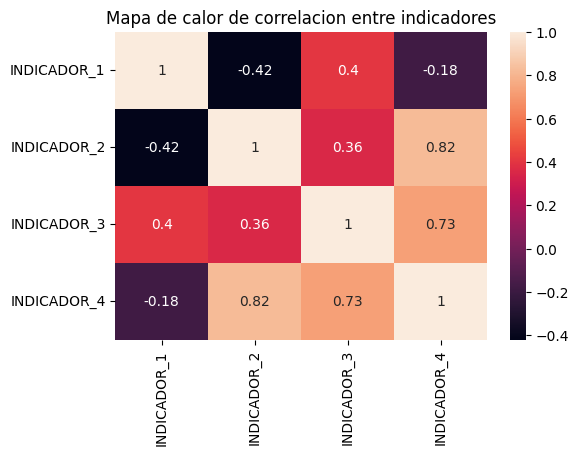

In [68]:
data_ind = data.select_dtypes(include=["float64"]) # tomemos los float
data_ind_corr = data_ind.corr() # calculamos matriz de correlación

plt.figure(figsize=(6,4))
sns.heatmap(data_ind_corr, annot=True)
plt.title("Mapa de calor de correlacion entre indicadores")
plt.show()

<center>

El indicador 2 y 4 tienen una relacion directa fuerte, es probable que tengan cierto porcentaje de redundancia, el indicador 1 y 4 aunque cuenten con una relación inversa, no es tan fuerta y de hecho es más cercana a 0, probablemente brinden información diferente, La relación entre los otros distintos pares que se pueden formar no parecen estar muy inclinados hacia una relacion inversa o directa, por lo que se podrían estudiar sin preocupación

</center>

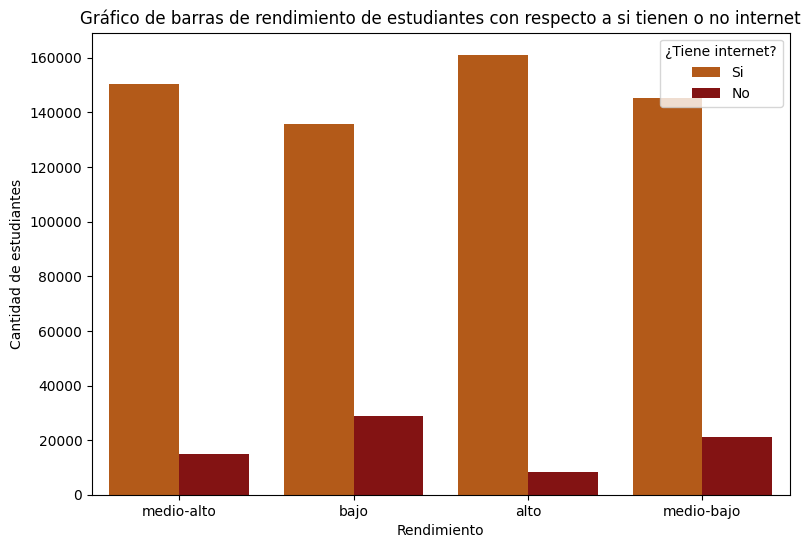

In [69]:
plt.figure(figsize=(9,6))
sns.countplot(data=data, x="RENDIMIENTO_GLOBAL", hue="F_TIENEINTERNET", palette={"Si": "#CC5600", "No": "#960000"})
plt.title("Gráfico de barras de rendimiento de estudiantes con respecto a si tienen o no internet")
plt.xlabel("Rendimiento")
plt.ylabel("Cantidad de estudiantes")
plt.legend(title="¿Tiene internet?")
plt.show()

<center>

Hay una gran diferencia entre estudiantes con y sin computador, se observa como aquellos que no tienen computador, en su mayoria tienen rendimiento bajo y medio-bajo, en el caso de aquellos con computador, la mayoria de estos tuvieron rendimiento alto y medio-alto

</center>

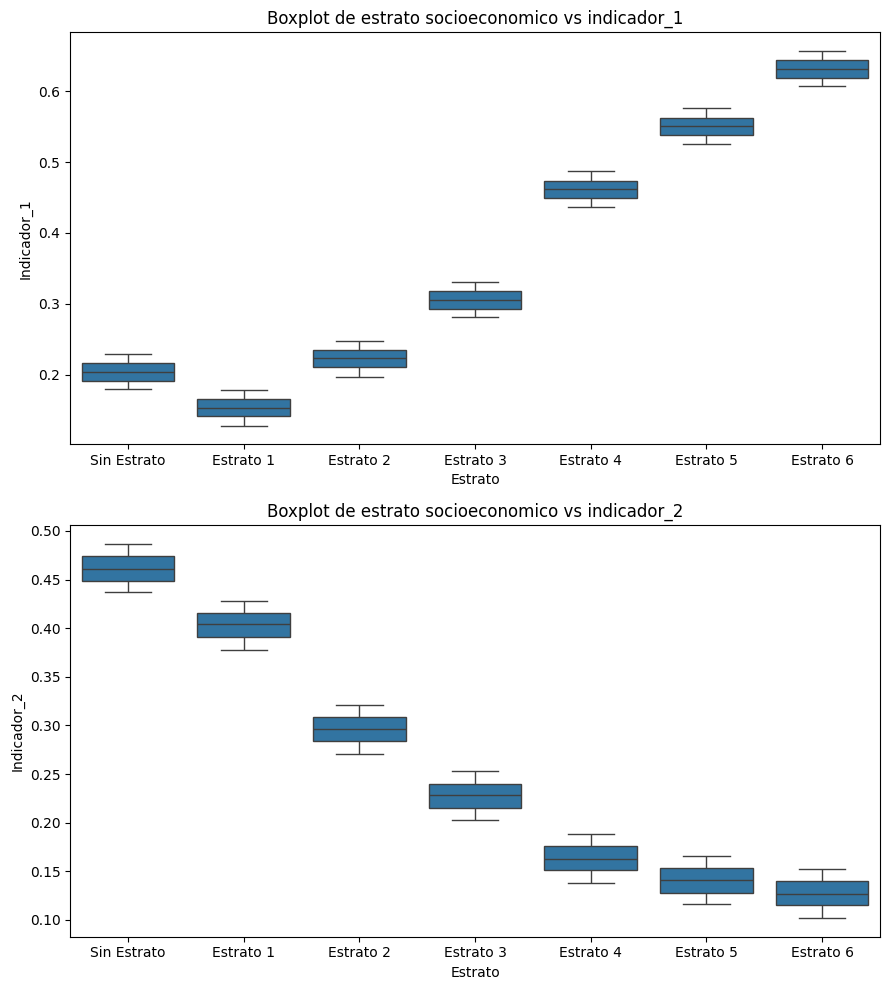

In [70]:
order_estrato = ["Sin Estrato", "Estrato 1", "Estrato 2", "Estrato 3", "Estrato 4", "Estrato 5", "Estrato 6"]
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(9,10))
sns.boxplot(data=data, x="F_ESTRATOVIVIENDA", y="INDICADOR_1", ax=ax1, order=order_estrato)
ax1.set_title("Boxplot de estrato socioeconomico vs indicador_1")
ax1.set_xlabel("Estrato")
ax1.set_ylabel("Indicador_1")

sns.boxplot(data=data, x="F_ESTRATOVIVIENDA", y="INDICADOR_2", ax=ax2, order=order_estrato)
ax2.set_title("Boxplot de estrato socioeconomico vs indicador_2")
ax2.set_xlabel("Estrato")
ax2.set_ylabel("Indicador_2")

plt.tight_layout()
plt.show()

<center>

Parece que el indicador tiene relación con el estrato, el indicador 1 y 2 con respecto al estrato parece tener una relación inversa bastante notoria, aunque sus valores en el eje Y no difieran en gran magnitud

</center>

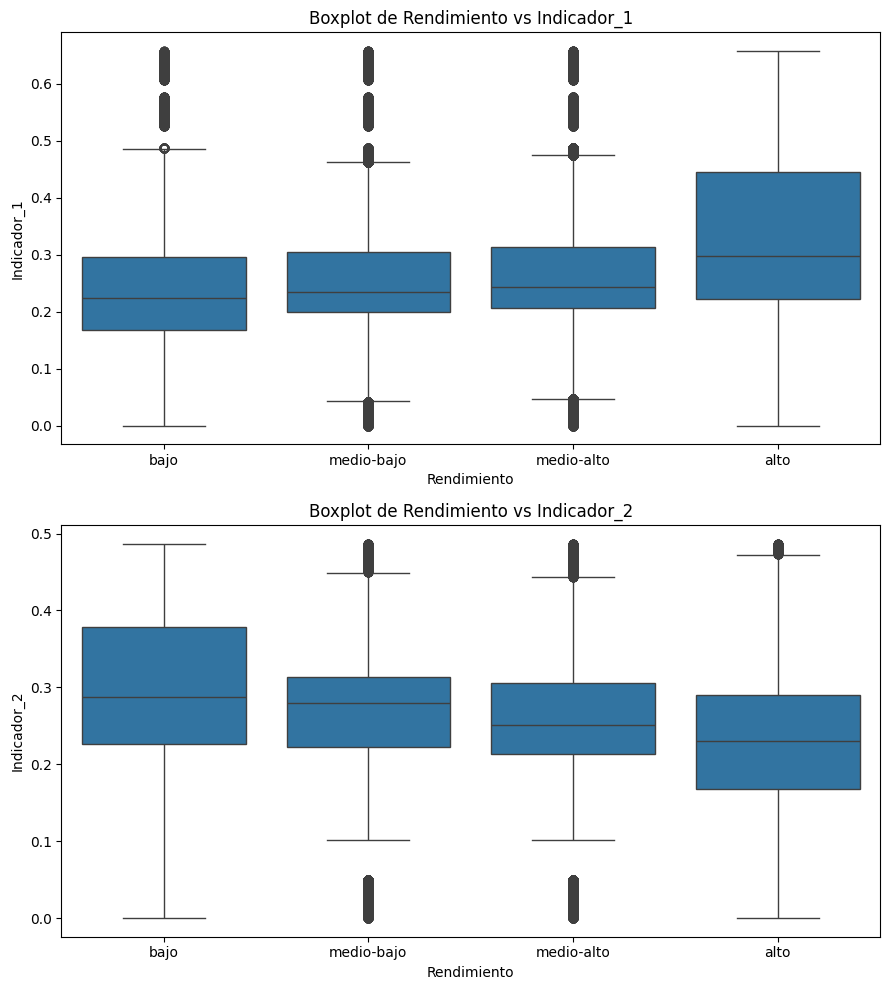

In [71]:
order_rend = ["bajo", "medio-bajo", "medio-alto", "alto"]
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(9,10))
sns.boxplot(data=data, x="RENDIMIENTO_GLOBAL", y="INDICADOR_1", ax=ax1, order=order_rend)
ax1.set_title("Boxplot de Rendimiento vs Indicador_1")
ax1.set_xlabel("Rendimiento")
ax1.set_ylabel("Indicador_1")

sns.boxplot(data=data, x="RENDIMIENTO_GLOBAL", y="INDICADOR_2", ax=ax2, order=order_rend)
ax2.set_title("Boxplot de Rendimiento vs Indicador_2")
ax2.set_xlabel("Rendimiento")
ax2.set_ylabel("Indicador_2")

plt.tight_layout()
plt.show()

<center>

En este tambien podemos ver que su relación inversa no es de gran magnitud, aunque podemos ver como hay mas tendencia de outliers en extremo superior para el indicador 1, mientras que para el indicador 2 los atípicos parecen estar más por la cola inferior

</center>

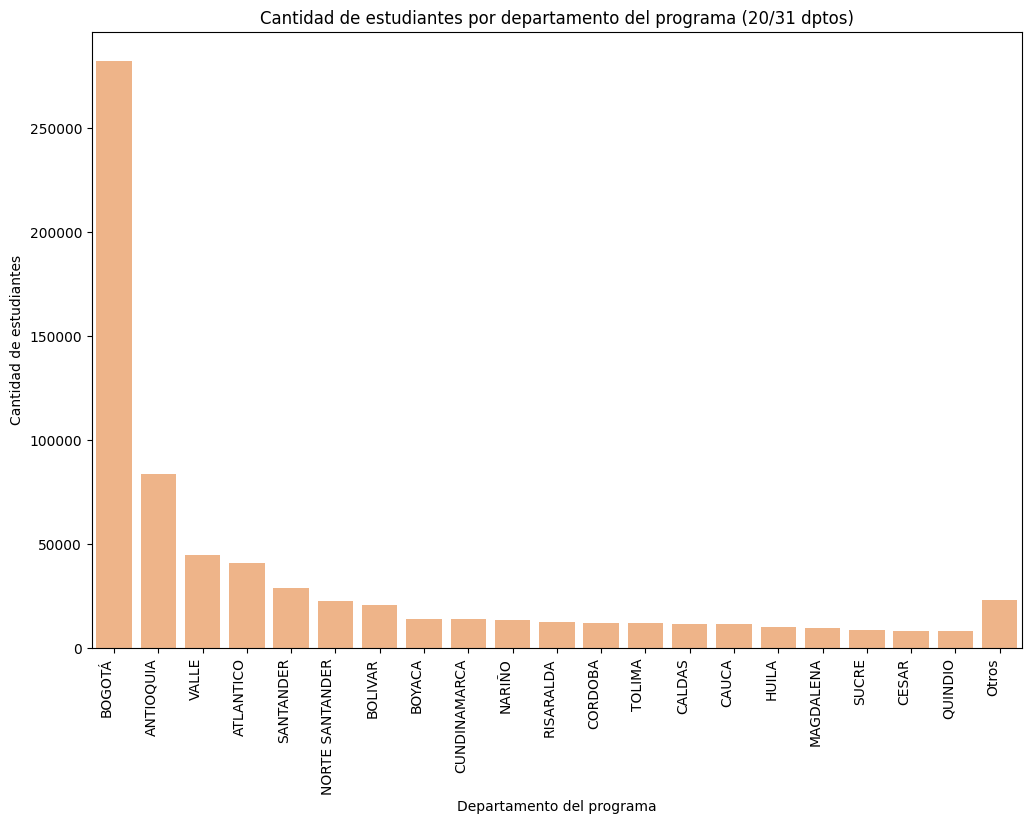

In [72]:
cont_prgm_dpto = data["E_PRGM_DEPARTAMENTO"].value_counts()
top = 20
top_dptos = cont_prgm_dpto.head(top) # las 15 departamentos que mas se repiten
otros = cont_prgm_dpto.iloc[top:].sum() # suma todos los demas departamentos
dptos = pd.concat([top_dptos, pd.Series({"Otros":otros})]) # agregamos los otros


plt.figure(figsize=(12,8))
sns.barplot(data = dptos, color="#FFB278")
plt.xticks(rotation=90, ha="right")
plt.title("Cantidad de estudiantes por departamento del programa (20/31 dptos)")
plt.xlabel("Departamento del programa")
plt.ylabel("Cantidad de estudiantes")
plt.show()

In [73]:
data["E_PRGM_DEPARTAMENTO"].value_counts().iloc[:5]

E_PRGM_DEPARTAMENTO
BOGOTÁ       282159
ANTIOQUIA     83607
VALLE         44588
ATLANTICO     41020
SANTANDER     28828
Name: count, dtype: int64

<center>

La gran mayoria de estudiantes en esta muestra estudian en Bogotá, por lo que parece ser que se encontró un sesgo positivo, hay una cola muy pesada a la derecha, ya que si observamos la cantidad por cada región, las muestras de Bogotá son más de tres veces las de Antioquia y mas de 6 veces las del Valle, quienes se encuentran en segunda y tercera posición respectivamente

</center>

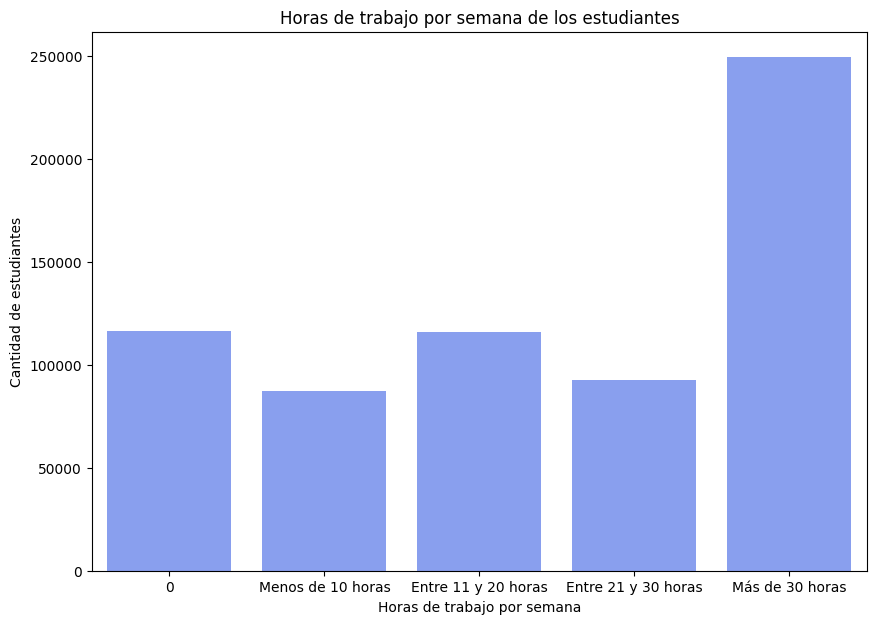

In [74]:
order_horas_trab = ["0", "Menos de 10 horas", "Entre 11 y 20 horas", "Entre 21 y 30 horas", "Más de 30 horas"]
plt.figure(figsize=(10,7))
sns.countplot(data=data, x= "E_HORASSEMANATRABAJA", color="#7895FF", order=order_horas_trab)
plt.title("Horas de trabajo por semana de los estudiantes")
plt.xlabel("Horas de trabajo por semana")
plt.ylabel("Cantidad de estudiantes")
plt.show()

<center>

Aqui se observa un sesgo negativo con una cola pesada a la izquierda, la mayoria de personas de la muestra trabajan mas de 30 horas semanales

</center>

In [75]:
tabla_est_trab = pd.crosstab(data["F_ESTRATOVIVIENDA"], data["E_HORASSEMANATRABAJA"])
tabla_est_trab.index.name = "Estrato"
tabla_est_trab.columns.name = "Horas trabajo (semanal)"
tabla_est_trab

Horas trabajo (semanal),0,Entre 11 y 20 horas,Entre 21 y 30 horas,Menos de 10 horas,Más de 30 horas
Estrato,,,,,
Estrato 1,19158,22607,15937,18458,34464
Estrato 2,33314,40783,32509,29602,94093
Estrato 3,34454,34446,29171,24281,86367
Estrato 4,16565,10560,8742,8302,20742
Estrato 5,7095,3594,3045,3185,6481
Estrato 6,4103,1777,1603,1705,3308
Sin Estrato,508,643,462,595,1001


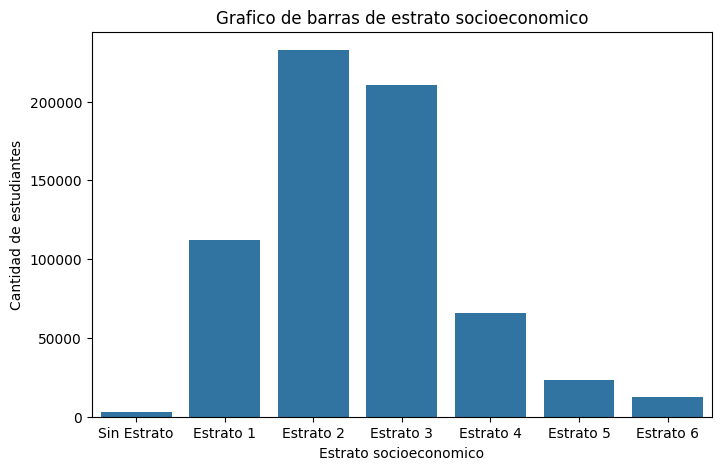

In [76]:
plt.figure(figsize=(8,5))
sns.countplot(data=data, x = "F_ESTRATOVIVIENDA", order=order_estrato)
plt.title("Grafico de barras de estrato socioeconomico")
plt.xlabel("Estrato socioeconomico")
plt.ylabel("Cantidad de estudiantes")
plt.show()

<center>

La mayoria de las personas en esta muestra son personas entre estrato 2 y 3

</center>

In [77]:
equals = data["F_TIENEINTERNET.1"].equals(data["F_TIENEINTERNET"])
if equals:
    print("La variable F_TIENEINTERNET.1 es exactamente la misma que F_TIENEINTERNET,\npor lo tanto se puede eliminar al ser una columna redundante")
else:
    print("La variable F_TIENEINTERNET.1 y F_TIENEINTERNET son distintas")

La variable F_TIENEINTERNET.1 es exactamente la misma que F_TIENEINTERNET,
por lo tanto se puede eliminar al ser una columna redundante


<center>

# **Resumen**

</center>

**Resumen de lo más destacado de este pequeño análisis:**

- Las personas con computador se espera que tengan mejor rendimiento que aquellos que no
- El indicador 1 parece estar relacionado con el rendimiento
- Hay una cantidad tan pequeña de personas privadas de la libertad que no parece un dato relevante
- Indicador 2 y 4 tienen una relación fuerte directa, se debe revisar si hay redundancia
- El indicador 1 y 4 tienen relación inversa
- Los demas indicadores no tiene relaciones muy fuerte, pueden dar información importante, por ejemplo los indicadores 1 y 2 a pesar de tener una relación inversa no muy fuerte se notan diferencias con respecto al estrato y el rendimiento de los estudiantes
- Hay sesgo positivo con una cola muy pesada en el departamento ofertado para los programas a los que están inscritos los estudiantes
- Hay sesgo negativo para las horas de trabajo por semana entre los estudiantes
- La variable F_TIENEINTERNET.1 y F_TIENEINTERNET son exactamente iguales, deberia ser eliminada almenos una de ellas
